## Abril el link y extraer el código de la página

In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from urllib.request import urlopen
import pprint
import re

In [216]:
url = 'https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html'
browser = webdriver.Chrome(r"C:\Users\jkp28\OneDrive\Mis documentos\GitHub\chromedriver") 
browser.get(url)

In [4]:
webpage = urlopen(url) 
soup = BeautifulSoup(webpage, "html.parser")
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<!--[if (gt IE 9)|!(IE)]> <!--><html class="no-js page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" itemid="https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html" itemscope="" itemtype="http://schema.org/NewsArticle" lang="en" xmlns:og="http://opengraphprotocol.org/schema/"><!--<![endif]-->
<!--[if IE 9]> <html lang="en" class="no-js ie9 lt-ie10 page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->
<!--[if IE 8]> <html lang="en" class="no-js ie8 lt-ie10 lt-ie9 page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->
<!--[if (lt IE 8)]> <html lang="en" class="no-js

## Extraer los códigos de las mentiras

In [5]:
mentiras = soup.findAll('span', attrs={'class': 'short-desc'})
mentiras

[<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>,
 <span class="short-desc"><strong>Jan. 21 </strong>“A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.” <span class="short-truth"><a href="http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/" target="_blank">(Trump was on the cover 11 times and Nixon appeared 55 times.)</a></span></span>,
 <span class="short-desc"><strong>Jan. 23 </strong>“Between 3 million and 5 million illegal votes caused me to lose the popular vote.” <span class="short-truth"><a href="https://www.nytimes.com/2017/01/23/us/politics/donald-trump-congress-democrats.html" target="_

In [6]:
print(len(mentiras))

180


Hay una base de 180 mentiras dichas por Trump

In [7]:
soup.title

<title data-rh="true">Opinion | President Trump’s Lies, the Definitive List - The New York Times</title>

## Extracción de la información

In [8]:
resultados = []
for mentira in mentiras:
    Fecha = mentira.find("strong").text[0:7]
    Mes =  mentira.find("strong").text[0:3]
    Mentira = mentira.contents[1][1:-2]
    Explicación = mentira.find('a').text[1:-1]
    Links = mentira.find('a')['href']
    resultados.append((Mentira, Explicación, Fecha, Mes, Links))

In [9]:
print(len(resultados))

180


## Se aplica una estructura de datos a través de Pandas

In [10]:
import pandas as pd

In [11]:
Tabla = pd.DataFrame(resultados, columns=['Mentira', 'Explicación', 'Fecha', 'Mes', 'Link'])

In [12]:
print(len(Tabla))

180


## Se muestran ejemplos de la tabla

In [14]:
Tabla.head()

,Mentira,Explicación,Fecha,Mes,Link
0,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,Jan. 21,Jan,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,Jan. 21,Jan,http://nation.time.com/2013/11/06/10-things-yo...
2,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,Jan. 23,Jan,https://www.nytimes.com/2017/01/23/us/politics...
3,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,Jan. 25,Jan,https://www.nytimes.com/2017/01/21/us/politics...
4,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,Jan. 25,Jan,https://www.nytimes.com/2017/01/24/us/politics...


In [16]:
Tabla.tail()

,Mentira,Explicación,Fecha,Mes,Link
175,We have trade deficits with almost everybody.,We have trade surpluses with more than 100 cou...,Oct. 25,Oct,https://www.bea.gov/newsreleases/international...
176,"Wacky & totally unhinged Tom Steyer, who has b...",Steyer has financially supported many winning ...,Oct. 27,Oct,https://www.opensecrets.org/donor-lookup/resul...
177,"Again, we're the highest-taxed nation, just ab...",We're not.,Nov. 1,Nov,http://www.politifact.com/truth-o-meter/statem...
178,When you look at the city with the strongest g...,"Several other cities, including New York and L...",Nov. 7,Nov,http://www.politifact.com/truth-o-meter/statem...
179,"I'd rather have him – you know, work with him...","There is no evidence that Democrats ""set up"" R...",Nov. 11,Nov,https://www.nytimes.com/interactive/2017/12/10...


## Obtener la informaciób de las páginas con las mentiras

In [17]:
tags = soup.find_all('a')
for tag in tags:
    print(tag.get('href'))

http://www.nytimes.com/content/help/site/ie9-support.html
http://www.nytimes.com/
https://www.nytimes.com/pages/opinion/index.html
https://nyti.ms/2sZlbZl
https://www.nytimes.com/pages/opinion/index.html
http://www.nytimes.com/by/david-leonhardt
https://www.nytimes.com/by/stuart-a-thompson
#skip
https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the
http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/
https://www.nytimes.com/2017/01/23/us/politics/donald-trump-congress-democrats.html
https://www.nytimes.com/2017/01/21/us/politics/trump-white-house-briefing-inauguration-crowd-size.html
https://www.nytimes.com/2017/01/24/us/politics/unauthorized-immigrant-voting-trump-lie.html
https://www.nytimes.com/2017/03/13/us/politics/fact-check-trump-obamacare-health-care.html
https://www.dnainfo.com/chicago/2017-chicago-murders/timeline?mon=1
https://www.nytimes.com/interactive/2017/01/29/us/refugee-vetting-process.html
https://www.wa

In [168]:
links = soup.find_all('a')
links = re.findall('"(https://www.nytimes.com/2017/.+?)"', str(links))

In [169]:
len(links)

41

In [170]:
links

['https://www.nytimes.com/2017/01/23/us/politics/donald-trump-congress-democrats.html',
 'https://www.nytimes.com/2017/01/21/us/politics/trump-white-house-briefing-inauguration-crowd-size.html',
 'https://www.nytimes.com/2017/01/24/us/politics/unauthorized-immigrant-voting-trump-lie.html',
 'https://www.nytimes.com/2017/03/13/us/politics/fact-check-trump-obamacare-health-care.html',
 'https://www.nytimes.com/2017/01/28/nyregion/jfk-protests-trump-refugee-ban.html',
 'https://www.nytimes.com/2017/02/07/us/politics/the-white-house-list-of-terror-attacks-underreported-by-media.html',
 'https://www.nytimes.com/2017/02/16/us/politics/trump-fact-check.html',
 'https://www.nytimes.com/2017/02/19/world/europe/last-night-in-sweden-trumps-remark-baffles-a-nation.html?rref=collection%2Ftimestopic%2FSweden&amp;action=click&amp;contentCollection=world&amp;region=stream&amp;module=stream_unit&amp;version=latest&amp;contentPlacement=7&amp;pgtype=collection',
 'https://www.nytimes.com/2017/02/24/us/po

In [171]:
import time
def try_request(url):
    html = requests.get(url).text
    time.sleep(1)
    return html

In [172]:
for link in links:
    html = try_request(link)
    print(html[0:1000])
    print('_____________________________')

<!DOCTYPE html>
<html lang="en" itemId="https://www.nytimes.com/2017/01/23/us/politics/donald-trump-congress-democrats.html" itemType="http://schema.org/NewsArticle" itemScope="true" class="story" xmlns:og="http://opengraphprotocol.org/schema/">
  <head>
    <title data-rh="true">Trump Repeats Lie About Popular Vote in Meeting With Lawmakers - The New York Times</title><meta data-rh="true" itemprop="inLanguage" content="en-US"/><meta data-rh="true" property="article:published" itemprop="datePublished" content="2017-01-24T01:46:57.000Z"/><meta data-rh="true" property="article:modified" itemprop="dateModified" content="2018-01-20T03:39:56.618Z"/><meta data-rh="true" http-equiv="Content-Language" content="en"/><meta data-rh="true" name="robots" content="noarchive"/><meta data-rh="true" name="articleid" itemprop="identifier" content="100000004889955"/><meta data-rh="true" name="nyt_uri" itemprop="identifier" content="nyt://article/ae7c6be2-5326-5d32-8e97-cbfef29adc8f"/><meta data-rh="true"

<!DOCTYPE html>
<html lang="en" itemId="https://www.nytimes.com/2017/02/24/us/politics/fact-check-trump-blasts-fake-news-and-repeats-inaccurate-claims-at-cpac.html" itemType="http://schema.org/NewsArticle" itemScope="true" class="story" xmlns:og="http://opengraphprotocol.org/schema/">
  <head>
    <title data-rh="true">Fact Check: Trump Blasts ‘Fake News’ and Repeats Inaccurate Claims at CPAC - The New York Times</title><meta data-rh="true" itemprop="inLanguage" content="en-US"/><meta data-rh="true" property="article:published" itemprop="datePublished" content="2017-02-24T19:05:28.000Z"/><meta data-rh="true" property="article:modified" itemprop="dateModified" content="2017-12-22T03:26:04.476Z"/><meta data-rh="true" http-equiv="Content-Language" content="en"/><meta data-rh="true" name="robots" content="noarchive"/><meta data-rh="true" name="articleid" itemprop="identifier" content="100000004951618"/><meta data-rh="true" name="nyt_uri" itemprop="identifier" content="nyt://article/d2c29aa

<!DOCTYPE html>
<html lang="en" itemId="https://www.nytimes.com/2017/03/04/us/politics/trump-obama-tap-phones.html" itemType="http://schema.org/NewsArticle" itemScope="true" class="story" xmlns:og="http://opengraphprotocol.org/schema/">
  <head>
    <title data-rh="true">Trump, Offering No Evidence, Says Obama Tapped His Phones - The New York Times</title><meta data-rh="true" itemprop="inLanguage" content="en-US"/><meta data-rh="true" property="article:published" itemprop="datePublished" content="2017-03-04T15:37:14.000Z"/><meta data-rh="true" property="article:modified" itemprop="dateModified" content="2017-12-22T03:44:08.062Z"/><meta data-rh="true" http-equiv="Content-Language" content="en"/><meta data-rh="true" name="robots" content="noarchive"/><meta data-rh="true" name="articleid" itemprop="identifier" content="100000004970735"/><meta data-rh="true" name="nyt_uri" itemprop="identifier" content="nyt://article/d08ed023-db73-5500-9702-47e26df1fb58"/><meta data-rh="true" name="pubp_ev

<!DOCTYPE html>
<!--[if (gt IE 9)|!(IE)]> <!--> <html lang="en" class="no-js section-asia format-medium tone-news app-article page-theme-standard  has-top-ad type-size-small has-large-lede" itemid="https://www.nytimes.com/2017/04/07/world/asia/fact-check-trump-china-trade.html" itemtype="http://schema.org/NewsArticle"  itemscope xmlns:og="http://opengraphprotocol.org/schema/"> <!--<![endif]-->
<!--[if IE 9]> <html lang="en" class="no-js ie9 lt-ie10 section-asia format-medium tone-news app-article page-theme-standard  has-top-ad type-size-small has-large-lede" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->
<!--[if IE 8]> <html lang="en" class="no-js ie8 lt-ie10 lt-ie9 section-asia format-medium tone-news app-article page-theme-standard  has-top-ad type-size-small has-large-lede" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->
<!--[if (lt IE 8)]> <html lang="en" class="no-js lt-ie10 lt-ie9 lt-ie8 section-asia format-medium tone-news app-article page-theme-sta

<!DOCTYPE html>
<!--[if (gt IE 9)|!(IE)]> <!--> <html lang="en" class="no-js section-politics format-medium tone-news app-article page-theme-standard  has-top-ad type-size-small has-large-lede" itemid="https://www.nytimes.com/2017/05/10/us/politics/fact-check-fbi-james-comey-sarah-huckabee-sanders.html" itemtype="http://schema.org/NewsArticle"  itemscope xmlns:og="http://opengraphprotocol.org/schema/"> <!--<![endif]-->
<!--[if IE 9]> <html lang="en" class="no-js ie9 lt-ie10 section-politics format-medium tone-news app-article page-theme-standard  has-top-ad type-size-small has-large-lede" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->
<!--[if IE 8]> <html lang="en" class="no-js ie8 lt-ie10 lt-ie9 section-politics format-medium tone-news app-article page-theme-standard  has-top-ad type-size-small has-large-lede" xmlns:og="http://opengraphprotocol.org/schema/"> <![endif]-->
<!--[if (lt IE 8)]> <html lang="en" class="no-js lt-ie10 lt-ie9 lt-ie8 section-politics format-mediu

<!DOCTYPE html>
<html lang="en" itemId="https://www.nytimes.com/2017/10/16/us/politics/trump-obama-killed-soldiers.html" itemType="http://schema.org/NewsArticle" itemScope="true" class="story" xmlns:og="http://opengraphprotocol.org/schema/">
  <head>
    <title data-rh="true">Trump Falsely Claims Obama Didn’t Contact Families of Fallen Troops - The New York Times</title><meta data-rh="true" itemprop="inLanguage" content="en-US"/><meta data-rh="true" property="article:published" itemprop="datePublished" content="2017-10-16T21:27:54.000Z"/><meta data-rh="true" property="article:modified" itemprop="dateModified" content="2017-10-20T20:03:36.627Z"/><meta data-rh="true" http-equiv="Content-Language" content="en"/><meta data-rh="true" name="robots" content="noarchive"/><meta data-rh="true" name="articleid" itemprop="identifier" content="100000005499263"/><meta data-rh="true" name="nyt_uri" itemprop="identifier" content="nyt://article/f7bc7dce-90a1-554c-8b9d-b34a0c68e592"/><meta data-rh="true

## Extraer detalles de cada página

In [173]:
def get_html(url):
    resp = requests.get(url).text
    return BeautifulSoup(resp,"lxml")

In [174]:
prueba = links[20]
prueba

'https://www.nytimes.com/2017/03/23/us/politics/fact-check-trump-misleads-surveillance-wiretapping.html'

In [175]:
def get_title(soup):
    return soup.title.text.strip()

In [176]:
def get_speech(soup):
    return str(soup.find_all('p'))

In [177]:
def remove_tags(text):
    return re.sub('<[^>]+>|\]|\[|\\u200b|\\n|\xa0', '', text)

In [178]:
def get_speech_elements(speech_url):
    print('Speech url: ', speech_url)
    soup = get_html(speech_url)
    title = get_title(soup)
    speeches = remove_tags(get_speech(soup))
    return [title, speech_url, speeches]

In [179]:
textos = get_speech_elements(prueba)
textos

Speech url:  https://www.nytimes.com/2017/03/23/us/politics/fact-check-trump-misleads-surveillance-wiretapping.html


['Fact Check: Trump Misleads About The Times’s Reporting on Surveillance - The New York Times',
 'https://www.nytimes.com/2017/03/23/us/politics/fact-check-trump-misleads-surveillance-wiretapping.html',
 'Supported by, By Linda Qiu, WASHINGTON — In an interview with Time magazine on Wednesday, President Trump cited The New York Times as evidence of his claim, made in a series of Twitter posts on March 4, that President Barack Obama had wiretapped his phones in Trump Tower during the 2016 presidential campaign. The F.B.I. director, other top intelligence officials and numerous Republicans have rejected this claim., Here’s an assessment of Mr. Trump’s references to The Times’s reporting., “Here, headline, for the front page of The New York Times, ‘Wiretapped data used in inquiry of Trump aides.’ That’s a headline. Now they then dropped that headline, I never saw this until this morning. They then dropped that headline, and they used another headline without the word wiretap, but they did

## Análisis de texto Pandas

In [180]:
type(Tabla)

pandas.core.frame.DataFrame

In [181]:
Tabla.loc[:,['Fecha','Mentira']]

,Fecha,Mentira
0,Jan. 21,I wasn't a fan of Iraq. I didn't want to go in...
1,Jan. 21,A reporter for Time magazine — and I have been...
2,Jan. 23,Between 3 million and 5 million illegal votes ...
3,Jan. 25,"Now, the audience was the biggest ever. But th..."
4,Jan. 25,Take a look at the Pew reports (which show vot...
5,Jan. 25,You had millions of people that now aren't ins...
6,Jan. 25,"So, look, when President Obama was there two w..."
7,Jan. 26,We've taken in tens of thousands of people. We...
8,Jan. 26,I cut off hundreds of millions of dollars off ...
9,Jan. 28,The coverage about me in the @nytimes and the ...


In [182]:
Mentiras_count = Tabla['Mentira'].agg('count')
Mentiras_count

180

In [183]:
Tabla.Mes

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
5      Jan
6      Jan
7      Jan
8      Jan
9      Jan
10     Jan
11     Jan
12     Feb
13     Feb
14     Feb
15     Feb
16     Feb
17     Feb
18     Feb
19     Feb
20     Feb
21     Feb
22     Feb
23     Feb
24     Feb
25     Feb
26     Feb
27     Feb
28     Feb
29     Feb
      ... 
150    Oct
151    Oct
152    Oct
153    Oct
154    Oct
155    Oct
156    Oct
157    Oct
158    Oct
159    Oct
160    Oct
161    Oct
162    Oct
163    Oct
164    Oct
165    Oct
166    Oct
167    Oct
168    Oct
169    Oct
170    Oct
171    Oct
172    Oct
173    Oct
174    Oct
175    Oct
176    Oct
177    Nov
178    Nov
179    Nov
Name: Mes, Length: 180, dtype: object

## Análisis de texto

### Palabras más repetidas

In [184]:
type(html)

str

In [185]:
all_tokens = html.split()
all_tokens

['<!DOCTYPE',
 'html>',
 '<html',
 'lang="en"',
 'itemId="https://www.nytimes.com/2017/10/16/us/politics/trump-obama-killed-soldiers.html"',
 'itemType="http://schema.org/NewsArticle"',
 'itemScope="true"',
 'class="story"',
 'xmlns:og="http://opengraphprotocol.org/schema/">',
 '<head>',
 '<title',
 'data-rh="true">Trump',
 'Falsely',
 'Claims',
 'Obama',
 'Didn’t',
 'Contact',
 'Families',
 'of',
 'Fallen',
 'Troops',
 '-',
 'The',
 'New',
 'York',
 'Times</title><meta',
 'data-rh="true"',
 'itemprop="inLanguage"',
 'content="en-US"/><meta',
 'data-rh="true"',
 'property="article:published"',
 'itemprop="datePublished"',
 'content="2017-10-16T21:27:54.000Z"/><meta',
 'data-rh="true"',
 'property="article:modified"',
 'itemprop="dateModified"',
 'content="2017-10-20T20:03:36.627Z"/><meta',
 'data-rh="true"',
 'http-equiv="Content-Language"',
 'content="en"/><meta',
 'data-rh="true"',
 'name="robots"',
 'content="noarchive"/><meta',
 'data-rh="true"',
 'name="articleid"',
 'itemprop="id

In [186]:
alpha = [w for w in all_tokens if w.isalpha()]
alpha

['Falsely',
 'Claims',
 'Obama',
 'Contact',
 'Families',
 'of',
 'Fallen',
 'Troops',
 'The',
 'New',
 'York',
 'assertion',
 'belied',
 'a',
 'long',
 'record',
 'of',
 'meetings',
 'his',
 'Barack',
 'held',
 'with',
 'the',
 'families',
 'of',
 'killed',
 'service',
 'as',
 'well',
 'as',
 'calls',
 'and',
 'Mark',
 'and',
 'Falsely',
 'Claims',
 'Obama',
 'Contact',
 'Families',
 'of',
 'Fallen',
 'assertion',
 'belied',
 'a',
 'long',
 'record',
 'of',
 'meetings',
 'his',
 'Barack',
 'held',
 'with',
 'the',
 'families',
 'of',
 'killed',
 'service',
 'as',
 'well',
 'as',
 'calls',
 'and',
 'Falsely',
 'Claims',
 'Obama',
 'Contact',
 'Families',
 'of',
 'Fallen',
 'assertion',
 'belied',
 'a',
 'long',
 'record',
 'of',
 'meetings',
 'his',
 'Barack',
 'held',
 'with',
 'the',
 'families',
 'of',
 'killed',
 'service',
 'as',
 'well',
 'as',
 'calls',
 'and',
 'Barack',
 'Obama',
 'honoring',
 'troops',
 'who',
 'were',
 'killed',
 'in',
 'Afghanistan',
 'at',
 'Dover',
 'Air'

In [187]:
lower = [w.lower() for w in alpha]
lower

['falsely',
 'claims',
 'obama',
 'contact',
 'families',
 'of',
 'fallen',
 'troops',
 'the',
 'new',
 'york',
 'assertion',
 'belied',
 'a',
 'long',
 'record',
 'of',
 'meetings',
 'his',
 'barack',
 'held',
 'with',
 'the',
 'families',
 'of',
 'killed',
 'service',
 'as',
 'well',
 'as',
 'calls',
 'and',
 'mark',
 'and',
 'falsely',
 'claims',
 'obama',
 'contact',
 'families',
 'of',
 'fallen',
 'assertion',
 'belied',
 'a',
 'long',
 'record',
 'of',
 'meetings',
 'his',
 'barack',
 'held',
 'with',
 'the',
 'families',
 'of',
 'killed',
 'service',
 'as',
 'well',
 'as',
 'calls',
 'and',
 'falsely',
 'claims',
 'obama',
 'contact',
 'families',
 'of',
 'fallen',
 'assertion',
 'belied',
 'a',
 'long',
 'record',
 'of',
 'meetings',
 'his',
 'barack',
 'held',
 'with',
 'the',
 'families',
 'of',
 'killed',
 'service',
 'as',
 'well',
 'as',
 'calls',
 'and',
 'barack',
 'obama',
 'honoring',
 'troops',
 'who',
 'were',
 'killed',
 'in',
 'afghanistan',
 'at',
 'dover',
 'air'

In [188]:
len(alpha)

2698

In [189]:
len(set(alpha))

611

In [190]:
import nltk
freqdist = nltk.FreqDist(alpha)
freqdist

FreqDist({'the': 133, 'of': 95, 'to': 76, 'in': 71, 'and': 68, 'var': 60, 'a': 59, 'if': 43, 'he': 38, 'solid': 35, ...})

In [191]:
freqdist.most_common()

[('the', 133),
 ('of', 95),
 ('to', 76),
 ('in', 71),
 ('and', 68),
 ('var', 60),
 ('a', 59),
 ('if', 43),
 ('he', 38),
 ('solid', 35),
 ('Obama', 34),
 ('on', 30),
 ('return', 28),
 ('Trump', 27),
 ('his', 25),
 ('with', 24),
 ('new', 24),
 ('killed', 23),
 ('as', 21),
 ('families', 20),
 ('at', 19),
 ('not', 19),
 ('was', 19),
 ('former', 16),
 ('said', 16),
 ('about', 15),
 ('had', 14),
 ('who', 13),
 ('were', 13),
 ('function', 13),
 ('this', 13),
 ('Families', 12),
 ('Fallen', 12),
 ('Barack', 12),
 ('American', 12),
 ('them', 12),
 ('York', 11),
 ('calls', 11),
 ('Afghanistan', 11),
 ('for', 11),
 ('call', 11),
 ('Falsely', 10),
 ('Claims', 10),
 ('Contact', 10),
 ('is', 10),
 ('that', 10),
 ('I', 10),
 ('Special', 10),
 ('troops', 9),
 ('auto', 9),
 ('President', 9),
 ('did', 9),
 ('Niger', 9),
 ('New', 8),
 ('else', 8),
 ('Green', 8),
 ('you', 8),
 ('make', 8),
 ('news', 8),
 ('National', 8),
 ('military', 8),
 ('over', 8),
 ('The', 7),
 ('assertion', 7),
 ('belied', 7),
 ('lon

In [192]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [193]:
tokens_no_stop = [w for w in alpha if w not in stopwords_esp]
tokens_no_stop

['Falsely',
 'Claims',
 'Obama',
 'Contact',
 'Families',
 'Fallen',
 'Troops',
 'The',
 'New',
 'York',
 'assertion',
 'belied',
 'long',
 'record',
 'meetings',
 'Barack',
 'held',
 'families',
 'killed',
 'service',
 'well',
 'calls',
 'Mark',
 'Falsely',
 'Claims',
 'Obama',
 'Contact',
 'Families',
 'Fallen',
 'assertion',
 'belied',
 'long',
 'record',
 'meetings',
 'Barack',
 'held',
 'families',
 'killed',
 'service',
 'well',
 'calls',
 'Falsely',
 'Claims',
 'Obama',
 'Contact',
 'Families',
 'Fallen',
 'assertion',
 'belied',
 'long',
 'record',
 'meetings',
 'Barack',
 'held',
 'families',
 'killed',
 'service',
 'well',
 'calls',
 'Barack',
 'Obama',
 'honoring',
 'troops',
 'killed',
 'Afghanistan',
 'Dover',
 'Air',
 'Force',
 'Donald',
 'States',
 'Defense',
 'Military',
 'States',
 'All',
 'code',
 'fit',
 'var',
 'xhr',
 'new',
 'query',
 'UserQuery',
 'user',
 'profile',
 'displayName',
 'userInfo',
 'regiId',
 'entitlements',
 'demographics',
 'emailSubscriptions',


In [194]:
freqdist = nltk.FreqDist(tokens_no_stop)
freqdist.most_common()

[('var', 60),
 ('solid', 35),
 ('Obama', 34),
 ('return', 28),
 ('Trump', 27),
 ('new', 24),
 ('killed', 23),
 ('families', 20),
 ('former', 16),
 ('said', 16),
 ('function', 13),
 ('Families', 12),
 ('Fallen', 12),
 ('Barack', 12),
 ('American', 12),
 ('York', 11),
 ('calls', 11),
 ('Afghanistan', 11),
 ('call', 11),
 ('Falsely', 10),
 ('Claims', 10),
 ('Contact', 10),
 ('I', 10),
 ('Special', 10),
 ('troops', 9),
 ('auto', 9),
 ('President', 9),
 ('Niger', 9),
 ('New', 8),
 ('else', 8),
 ('Green', 8),
 ('make', 8),
 ('news', 8),
 ('National', 8),
 ('military', 8),
 ('The', 7),
 ('assertion', 7),
 ('belied', 7),
 ('long', 7),
 ('record', 7),
 ('meetings', 7),
 ('held', 7),
 ('service', 7),
 ('well', 7),
 ('Dover', 7),
 ('Air', 7),
 ('Force', 7),
 ('four', 7),
 ('Berets', 7),
 ('conference', 7),
 ('fallen', 7),
 ('States', 6),
 ('presidents', 6),
 ('planned', 6),
 ('Iraq', 6),
 ('senior', 6),
 ('officials', 6),
 ('August', 6),
 ('Chinook', 6),
 ('helicopter', 6),
 ('shot', 6),
 ('Opera

In [195]:
not_of_interest = ['var','solid','calls','fallen']

In [196]:
tokens_of_interest = [w for w in tokens_no_stop if w not in not_of_interest]
tokens_of_interest

['Falsely',
 'Claims',
 'Obama',
 'Contact',
 'Families',
 'Fallen',
 'Troops',
 'The',
 'New',
 'York',
 'assertion',
 'belied',
 'long',
 'record',
 'meetings',
 'Barack',
 'held',
 'families',
 'killed',
 'service',
 'well',
 'Mark',
 'Falsely',
 'Claims',
 'Obama',
 'Contact',
 'Families',
 'Fallen',
 'assertion',
 'belied',
 'long',
 'record',
 'meetings',
 'Barack',
 'held',
 'families',
 'killed',
 'service',
 'well',
 'Falsely',
 'Claims',
 'Obama',
 'Contact',
 'Families',
 'Fallen',
 'assertion',
 'belied',
 'long',
 'record',
 'meetings',
 'Barack',
 'held',
 'families',
 'killed',
 'service',
 'well',
 'Barack',
 'Obama',
 'honoring',
 'troops',
 'killed',
 'Afghanistan',
 'Dover',
 'Air',
 'Force',
 'Donald',
 'States',
 'Defense',
 'Military',
 'States',
 'All',
 'code',
 'fit',
 'xhr',
 'new',
 'query',
 'UserQuery',
 'user',
 'profile',
 'displayName',
 'userInfo',
 'regiId',
 'entitlements',
 'demographics',
 'emailSubscriptions',
 'wat',
 'bundleSubscriptions',
 'bund

In [197]:
tokens_nltk = nltk.Text(tokens_of_interest)
tokens_nltk

<Text: Falsely Claims Obama Contact Families Fallen Troops The...>

In [198]:
tokens_of_interest_str = ' '.join(tokens_of_interest)
tokens_of_interest_str

'Falsely Claims Obama Contact Families Fallen Troops The New York assertion belied long record meetings Barack held families killed service well Mark Falsely Claims Obama Contact Families Fallen assertion belied long record meetings Barack held families killed service well Falsely Claims Obama Contact Families Fallen assertion belied long record meetings Barack held families killed service well Barack Obama honoring troops killed Afghanistan Dover Air Force Donald States Defense Military States All code fit xhr new query UserQuery user profile displayName userInfo regiId entitlements demographics emailSubscriptions wat bundleSubscriptions bundle inGrace promotion source subscriptionDetails isFreeTrial hasQueuedSub startDate endDate status entitlements new NYTD NYTD function const r const v c r return return new init Falsely Claims Obama Contact Families Fallen testCookie testCookie function match return gptScript googletag googletag readCookie match return Allows user EEA Allows prebid

In [199]:
with open('tokens_of_interest_str.txt', 'a') as f:
    f.write(tokens_of_interest_str)

In [200]:
import os
os.path

<module 'ntpath' from 'C:\\Users\\jkp28\\Anaconda3\\lib\\ntpath.py'>

In [201]:
mentiras_nltk = nltk.Text(html2.split())
mentiras_nltk

<Text: <!DOCTYPE html> <html lang="en" itemId="https://www.nytimes.com/2017/10/16/us/politics/trump-obama-killed-soldiers.html" itemType="http://schema.org/NewsArticle" itemScope="true" class="story"...>

In [214]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0]

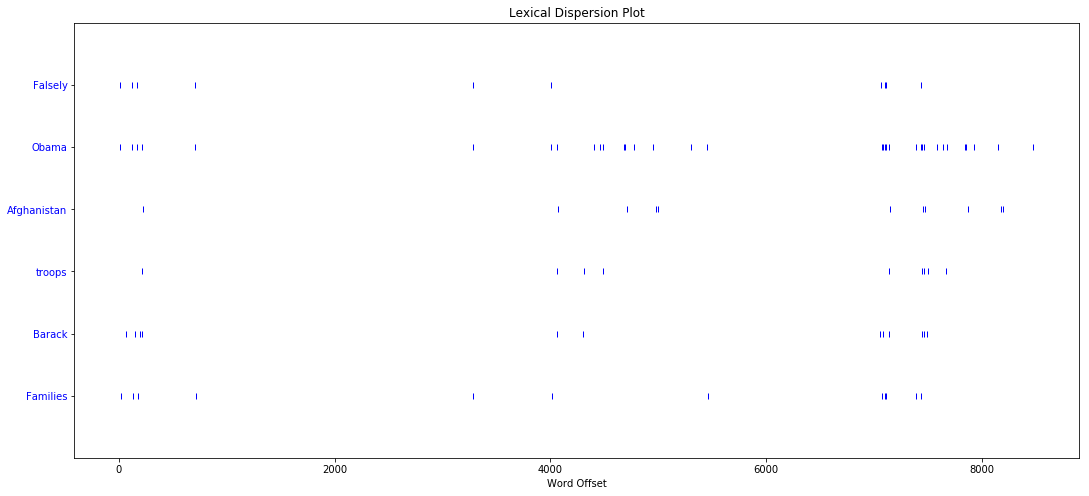

In [215]:
mentiras_nltk.dispersion_plot(["Falsely", "Obama", "Afghanistan", "troops", "Barack", "Families"])

In [203]:
mentiras_nltk.concordance('obama')

Displaying 25 of 25 matches:
 Obama Didn’t Contact Families of Fallen Tr
title" content="Trump Falsely Claims Obama Didn’t Contact Families of Fallen Tr
title" content="Trump Falsely Claims Obama Didn’t Contact Families of Fallen Tr
image:alt" content="President Barack Obama honoring troops who were killed in A
rs.html" title="Trump Falsely Claims Obama Didn’t Contact Families of Fallen Tr
ss="css-rs6kf8">Trump Falsely Claims Obama Didn’t Contact Families of Fallen Tr
7b875086"><span>Trump Falsely Claims Obama Didn’t Contact Families of Fallen Tr
s-8i9d0s e1olku6u0">President Barack Obama honoring troops who were killed in A
 e2kc3sl0">“If you look at President Obama and other presidents, most of them d
belied a long record of meetings Mr. Obama held with the families of killed ser
oy 30,000 troops to Afghanistan, Mr. Obama traveled to Dover Air Force Base in 
ygdjhk e2kc3sl0">A spokesman for Mr. Obama declined to comment.</p><p class="cs
css-1ygdjhk e2kc3sl0">Several former Obama admi